# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Visualizing-detection-of-change-points-for-nonstationary-problems" data-toc-modified-id="Visualizing-detection-of-change-points-for-nonstationary-problems-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Visualizing detection of change points for nonstationary problems</a></div><div class="lev2 toc-item"><a href="#Creating-the-MAB-problems" data-toc-modified-id="Creating-the-MAB-problems-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Creating the MAB problems</a></div><div class="lev2 toc-item"><a href="#Plotting-the-history-of-means" data-toc-modified-id="Plotting-the-history-of-means-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plotting the history of means</a></div><div class="lev2 toc-item"><a href="#Plotting-with-indications-on-the-restart-times" data-toc-modified-id="Plotting-with-indications-on-the-restart-times-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Plotting with indications on the restart times</a></div><div class="lev2 toc-item"><a href="#Data-for-problem-1" data-toc-modified-id="Data-for-problem-1-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data for problem 1</a></div><div class="lev2 toc-item"><a href="#Data-for-problem-2" data-toc-modified-id="Data-for-problem-2-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Data for problem 2</a></div>

---
# Visualizing detection of change points for nonstationary problems
First, be sure to be in the main folder, or to have installed [`SMPyBandits`](https://github.com/SMPyBandits/SMPyBandits), and import `MAB` from `Environment` package:

!pip install SMPyBandits watermark

In [20]:
import sys
sys.path.append("..")

In [21]:
%load_ext watermark
%watermark -v -m -a "Lilian Besson"

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Lilian Besson 

CPython 3.6.7
IPython 7.4.0

compiler   : GCC 8.2.0
system     : Linux
release    : 4.15.0-48-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [22]:
from SMPyBandits.Environment.MAB import PieceWiseStationaryMAB, MAB

In [23]:
%matplotlib notebook
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
mpl.rcParams['figure.figsize'] = (10, 5.6)
import matplotlib.pyplot as plt

In [24]:
import seaborn as sns

In [25]:
sns.set(context="talk", style="whitegrid", palette="hls", font="sans-serif", font_scale=0.9)

In [39]:
from SMPyBandits.Environment.plotsettings import nrows_ncols

In [65]:
def palette(nb):
    return sns.hls_palette(nb + 1)[:nb]

def makemarkers(nb):
    allmarkers = ['o', 'D', '^', '<', 'v', 'p', 's', '*', 'h', '>']
    longlist = allmarkers * (1 + int(nb / float(len(allmarkers))))  # Cycle the good number of time
    return longlist[:nb]  # Truncate

## Creating the MAB problems

In [66]:
from SMPyBandits.configuration_nonstationary import *

In [67]:
envs = configuration['environment']
envs

[{'arm_type': SMPyBandits.Arms.Bernoulli.Bernoulli,
  'params': {'listOfMeans': [[0.3, 0.5, 0.9],
    [0.3, 0.2, 0.9],
    [0.3, 0.2, 0.1],
    [0.7, 0.2, 0.1],
    [0.7, 0.5, 0.1]],
   'changePoints': [0, 1000, 2000, 3000, 4000]}},
 {'arm_type': SMPyBandits.Arms.Bernoulli.Bernoulli,
  'params': {'listOfMeans': [[0.4, 0.5, 0.9],
    [0.5, 0.4, 0.7],
    [0.6, 0.3, 0.5],
    [0.7, 0.2, 0.3],
    [0.8, 0.1, 0.1]],
   'changePoints': [0, 1000, 2000, 3000, 4000]}}]

In [68]:
env1 = envs[0]
env2 = envs[1]

In [69]:
pb1 = PieceWiseStationaryMAB(env1)

  Special MAB problem, with arm (possibly) changing at every time step, read from a dictionnary 'configuration' = {'arm_type': <class 'SMPyBandits.Arms.Bernoulli.Bernoulli'>, 'params': {'listOfMeans': [[0.3, 0.5, 0.9], [0.3, 0.2, 0.9], [0.3, 0.2, 0.1], [0.7, 0.2, 0.1], [0.7, 0.5, 0.1]], 'changePoints': [0, 1000, 2000, 3000, 4000]}} ...
 - with 'arm_type' = <class 'SMPyBandits.Arms.Bernoulli.Bernoulli'>
 - with 'params' = {'listOfMeans': [[0.3, 0.5, 0.9], [0.3, 0.2, 0.9], [0.3, 0.2, 0.1], [0.7, 0.2, 0.1], [0.7, 0.5, 0.1]], 'changePoints': [0, 1000, 2000, 3000, 4000]}
 - with 'listOfMeans' = [[0.3 0.5 0.9]
 [0.3 0.2 0.9]
 [0.3 0.2 0.1]
 [0.7 0.2 0.1]
 [0.7 0.5 0.1]]
 - with 'changePoints' = [0, 1000, 2000, 3000, 4000]


 ==> Creating the dynamic arms ...
   - with 'nbArms' = 3
   - with 'arms' = [B(0.3), B(0.5), B(0.9)]
 - Initial draw of 'means' = [0.3 0.5 0.9]


In [70]:
pb2 = PieceWiseStationaryMAB(env2)

  Special MAB problem, with arm (possibly) changing at every time step, read from a dictionnary 'configuration' = {'arm_type': <class 'SMPyBandits.Arms.Bernoulli.Bernoulli'>, 'params': {'listOfMeans': [[0.4, 0.5, 0.9], [0.5, 0.4, 0.7], [0.6, 0.3, 0.5], [0.7, 0.2, 0.3], [0.8, 0.1, 0.1]], 'changePoints': [0, 1000, 2000, 3000, 4000]}} ...
 - with 'arm_type' = <class 'SMPyBandits.Arms.Bernoulli.Bernoulli'>
 - with 'params' = {'listOfMeans': [[0.4, 0.5, 0.9], [0.5, 0.4, 0.7], [0.6, 0.3, 0.5], [0.7, 0.2, 0.3], [0.8, 0.1, 0.1]], 'changePoints': [0, 1000, 2000, 3000, 4000]}
 - with 'listOfMeans' = [[0.4 0.5 0.9]
 [0.5 0.4 0.7]
 [0.6 0.3 0.5]
 [0.7 0.2 0.3]
 [0.8 0.1 0.1]]
 - with 'changePoints' = [0, 1000, 2000, 3000, 4000]


 ==> Creating the dynamic arms ...
   - with 'nbArms' = 3
   - with 'arms' = [B(0.4), B(0.5), B(0.9)]
 - Initial draw of 'means' = [0.4 0.5 0.9]


## Plotting the history of means

In [71]:
horizon = 5000

<IPython.core.display.Javascript object>


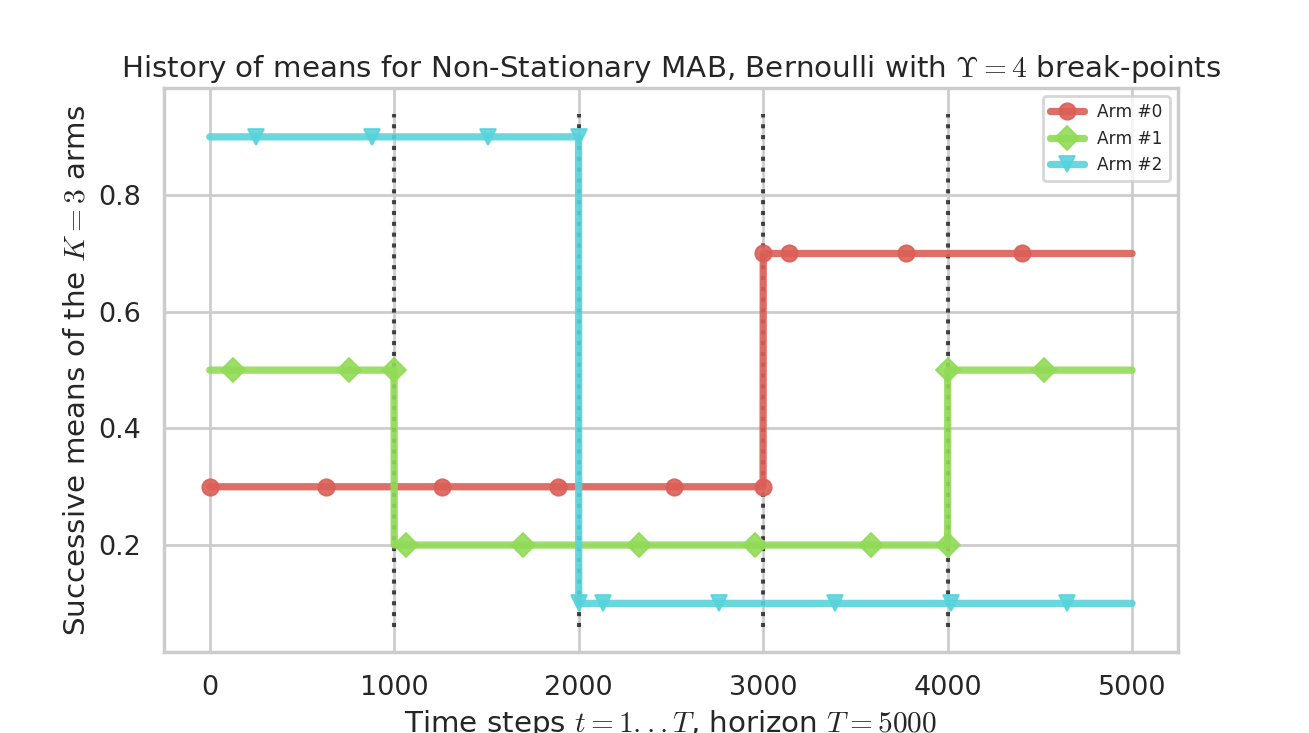

In [72]:
fig = pb1.plotHistoryOfMeans(horizon=horizon)

## Plotting with indications on the restart times

Now in a function, we use this data:


In [73]:
def plotHistoryOfMeans_with_restart(restart_points, labels, pb, problemId=1, horizon=horizon):
    nbAlgorithms = len(labels)
    nbArms = pb.nbArms
    means_of_all_arms = pb.get_allMeans(horizon=horizon)
    
    colors1 = sns.hls_palette(nbArms + 1)[:nbArms]
    markers1 = makemarkers(nbArms)
    linestyles1 = ['--', '-.', ':'] * nbArms
    linestyles1 = linestyles1[:nbArms]
    linewidths1 = [5, 3] * nbArms
    linewidths1 = linewidths1[:nbArms]

    colors2 = sns.husl_palette(nbAlgorithms + 1)[:nbAlgorithms]
    markers2 = makemarkers(nbAlgorithms)
    
    nrows, ncols = nrows_ncols(nbAlgorithms)
    
    fig, axes = plt.subplots(nrows, ncols, sharex=True, sharey=True)
    fig.suptitle("Locations of change-points detected by different algorithms (problem {})".format(problemId))
    
    # start for each algorithm
    for policyId, ax in enumerate(axes.flat[:nbAlgorithms]):
    # for policyId, label in enumerate(labels):
        label = labels[policyId]
        data = restart_points[label]
        regret = data["regret"]

        for armId in range(nbArms):
            meanOfThisArm = means_of_all_arms[armId, :]
            ax.plot(meanOfThisArm,
                     color=colors1[armId],
                     # marker=markers[armId], markevery=(armId / 50., 0.1),
                     label='Arm #{}'.format(armId),
                     #linestyle=linestyles1[armId],
                     #linewidth=linewidths1[armId],
                     linewidth=linewidths1[0],
                     alpha=0.7)

        plt.ylim(0, 1)
        ymin, ymax = plt.ylim()
        # for tau in pb.changePoints:
        #     if tau > 0 and tau < horizon:
        #         plt.vlines(tau, ymin, ymax, linestyles='dotted', alpha=0.7)

        #ax.set_xlabel(r"Time steps $t = 1...T$, horizon $T = {}$".format(horizon))
        #ax.set_ylabel(r"Successive means of the $K = {}$ arms".format(nbArms))
        ax.set_title("{} (regret $= {}$)".format(label, regret))
        #ax.set_title("Location of change-points detected by algorithm {} (regret = {})".format(label, regret))

        Xs, Ys = [], []
        for armId in range(nbArms):
            means = means_of_all_arms[armId]
            restarts = data[armId]
            times = [ time for time, nbsample in restarts ]
            Xs = times
            Ys = [ means[time] for time in times ]
            if Xs:
                ax.plot(Xs, Ys,
                        #color=colors2[policyId],
                        color=colors1[armId],
                        marker=markers2[policyId], markersize=15,
                        linestyle='',
                        label=label,
                        alpha=0.9)

    #plt.tight_layout(rect=[0.04, 0.04, 0.75, 0.92])
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), numpoints=1, fancybox=True, framealpha=0.8)

    plt.show()
    return fig, axes

## Data for problem 1

In [74]:
labels_1 = [
    "M-klUCB",
    "CUSUM-klUCB",
    "GLR-klUCB Local",
    "GLR-klUCB Global",
]

Then we have a dictionary mapping a label to the data of interest.
This is a dictionary mapping arm to list of couple (time, nb of samples since last restart).

In [75]:
restart_points_1 = {
    "M-klUCB": {
        0: [(3080, 828)],
        1: [],
        2: [(2055, 1811)],
        "regret": 280,
    },
    "CUSUM-klUCB": {
        0: [(3027, 825), (3505, 466), (4914, 1304)],
        1: [(2512, 249), (4383, 123)],
        2: [(2011, 1861), ],
        "regret": 150,
    },
    "GLR-klUCB Local": {
        0: [(3032, 840)],
        1: [],
        2: [(2014, 1970)],
        "regret": 63,
    },
    "GLR-klUCB Global": {
        0: [(3031, 827)],
        1: [],
        2: [(2009, 1972)],
        "regret": 71,
    },
}

Let's try!

<IPython.core.display.Javascript object>


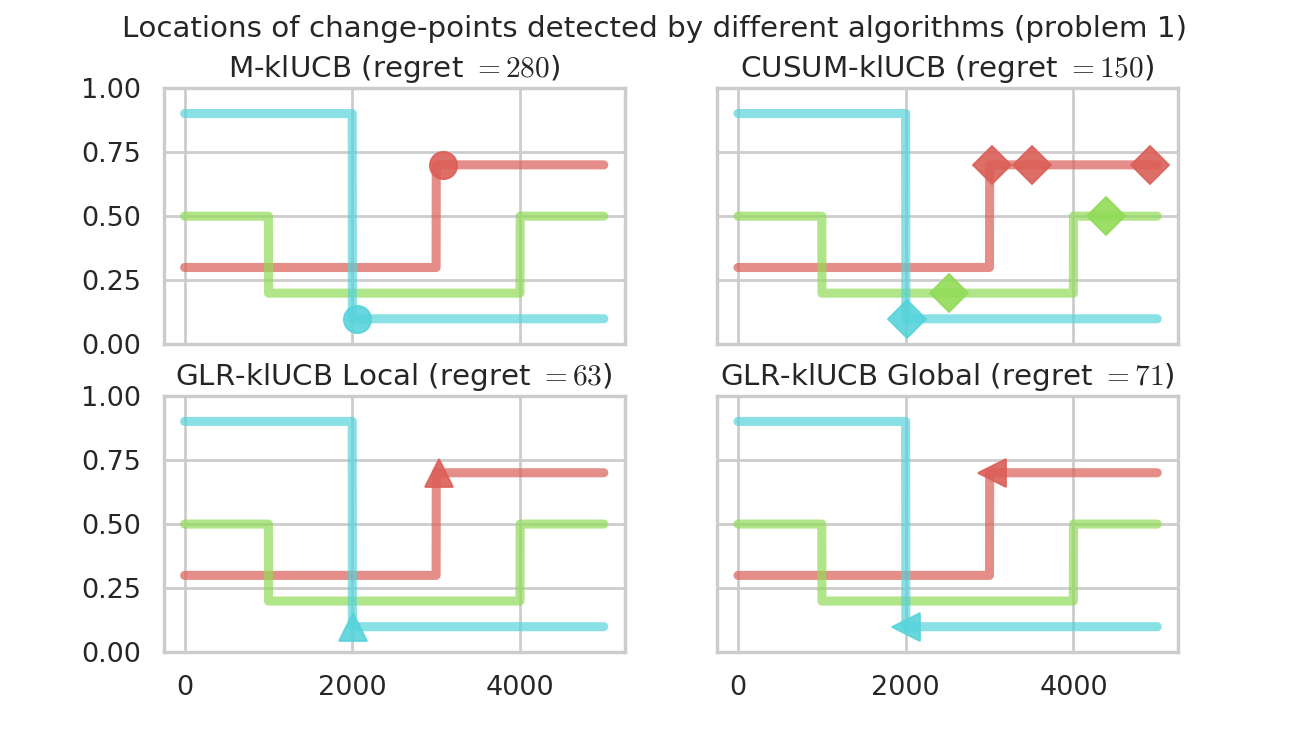

(<Figure size 1200x672 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3148dbccf8>,
       dtype=object))

In [76]:
plotHistoryOfMeans_with_restart(restart_points_1, labels_1, pb1, problemId=1, horizon=horizon)

In [77]:
plt.savefig("Visualizing_locations_of_change_points_for_different_algorithms__4algs_Pb1.png")
plt.savefig("Visualizing_locations_of_change_points_for_different_algorithms__4algs_Pb1.pdf")

## Data for problem 2

In [78]:
labels_2 = labels_1

In [79]:
restart_points_2 = {
    "M-klUCB": {
        0: [],
        1: [],
        2: [],
        "regret": 570,
    },
    "CUSUM-klUCB": {
        0: [(2305, 185), (2591, 272), (3387, 770)],
        1: [(3677, 169)],
        2: [(1055, 963), (2051, 922)],
        "regret": 150,
    },
    "GLR-klUCB Local": {
        0: [(2367, 1006), (4203, 1873)],
        1: [],
        2: [(1070, 1030)],
        "regret": 115,
    },
    "GLR-klUCB Global": {
        0: [(2705, 1038)],
        1: [],
        2: [(1111, 1060)],
        "regret": 125,
    },
}

<IPython.core.display.Javascript object>


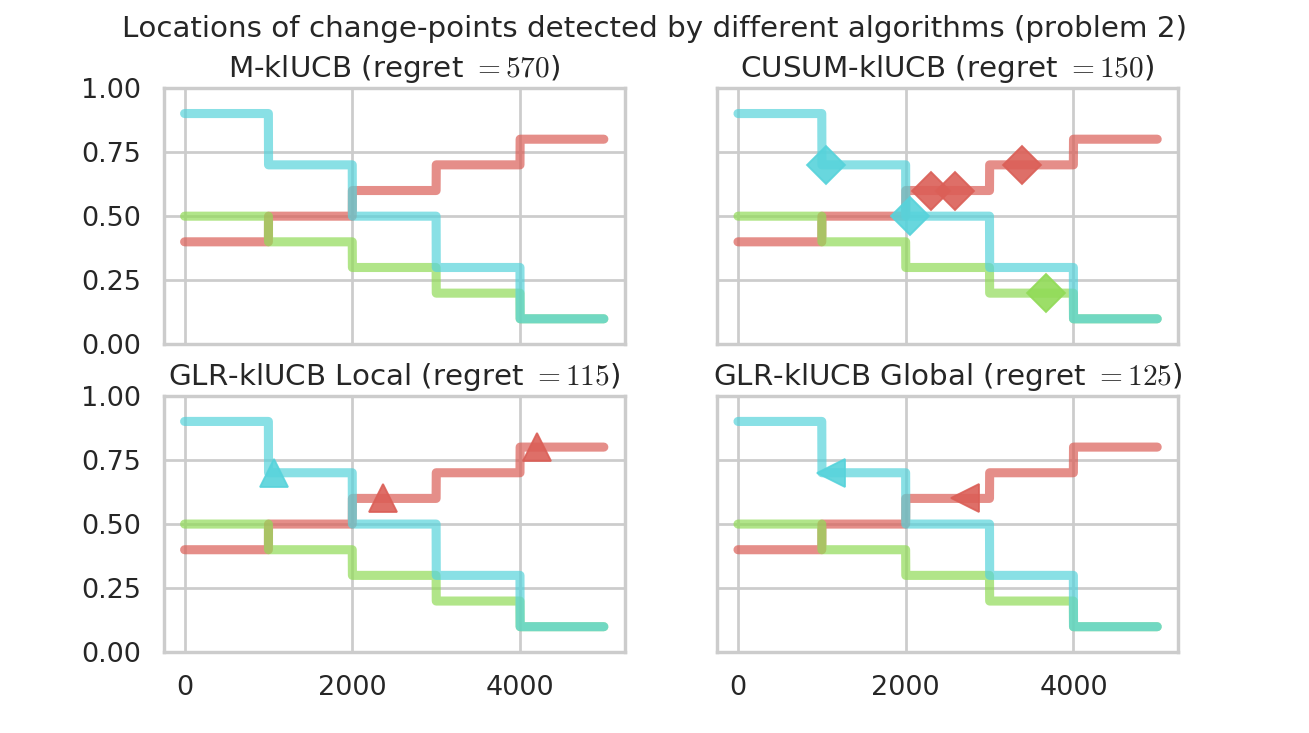

(<Figure size 1200x672 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3148cc22b0>,
       dtype=object))

In [80]:
plotHistoryOfMeans_with_restart(restart_points_2, labels_2, pb2, problemId=2, horizon=horizon)

In [81]:
plt.savefig("Visualizing_locations_of_change_points_for_different_algorithms__4algs_Pb2.png")
plt.savefig("Visualizing_locations_of_change_points_for_different_algorithms__4algs_Pb2.pdf")